# Non-Graded Challenge 1
Name : `Kamil Riyadi Alam Situmeang`

Batch : `FTDS009`

## I. Introduction

This project is meant for fulfilling `Hacktiv8 Fulltime Datascience Bootcamp assignment.`

In this project, I will try to make a `Machine Learning prediction model` using the concept of `Logistic Regression.`

### I.2 Dataset Description

Dataset for this project is made available by [`fedesoriano`](https://www.kaggle.com/fedesoriano), a kaggler from Madrid, Spain. You can check the dataset [here.](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset)

**Content**\
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.\
This dataset is used to `predict whether a patient is likely to get stroke based on the input parameters` like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

**Attribute Information**

| No | Input Parameters     | Description                                                                             |
| -- | -------------------- | --------------------------------------------------------------------------------------- |
| 1  |  id                  |  Unique Identifier                                                                      |
| 2  |  gender              |  "Male", "Female" Or "Other"                                                            |
| 3  |  age                 |  Age Of The Patient                                                                     |
| 4  |  hypertension        |  0 If The Patient Doesn't Have Hypertension, 1 If The Patient Has Hypertension          |
| 5  |  heart\_disease      |  0 If The Patient Doesn't Have Any Heart Diseases, 1 If The Patient Has A Heart Disease |
| 6  |  ever\_married       |  "No" Or "Yes"                                                                          |
| 7  |  work\_type          |  "Children", "Govt\_Jov", "Never\_Worked", "Private" Or "Self-Employed"                 |
| 8  |  Residence\_type     |  "Rural" Or "Urban"                                                                     |
| 9  |  avg\_glucose\_level |  Average Glucose Level In Blood                                                         |
| 10 |  bmi                 |  Body Mass Index                                                                        |
| 11 |  smoking\_status     |  "Formerly Smoked", "Never Smoked", "Smokes" Or "Unknown"\*                             |
| 12 |  stroke              |  1 If The Patient Had A Stroke Or 0 If Not                                              |

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

**Acknowledgements**

(Confidential Source) - Use only for educational purposes
If you use this dataset in your research, please credit the author.

### I.3 Objectives

Main objectives for this project are:
- Prepare data for `Machine Learning prediction model.`
- Implement `Logistic Regression` in `Machine Learning prediction model.`

## II. Import Libraries

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, plot_roc_curve, roc_auc_score

## III. Data Loading

Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [3]:
# Load Data and save it in `df_og` variable
df_og = pd.read_csv('healthcare-dataset-stroke-data.csv')

# Make copy from the df
df = df_og.copy()

# Show the dataset
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
# Dataset Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
# Dataset Shape
df.shape

(5110, 12)

The dataset consist of `5110 rows` of entries and `12 columns` with `bmi` column has apparent `null` values.

In [6]:
# Null value summary
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

It is confirmed that `bmi` column has `Standard Missing Value` and other columns are free from `Standard Missing Value.`

In [7]:
# Dataset Check
df.describe(percentiles=[0.5]).T

,count,mean,std,min,50%,max
id,5110.0,36517.829354,21161.721625,67.00,36932.000,72940.00
age,5110.0,43.226614,22.612647,0.08,45.000,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,91.885,271.74
bmi,4909.0,28.893237,7.854067,10.30,28.100,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,1.00


For a glance each numerical column in this dataset is seems okay, but if We look closely to column `age`, it has strange value in it.

Based on `Input Parameter Description`, input parameter `age` has description of ` Age Of The Patient`, but it has min value of 0.08, this could mean as `missing value.`

I will handle this missing value later in the process.

## IV. Exploratory Data Analysis

First, because I am not familiar in this health realted field, I'll surf the net and search any article regarding `what causing stroke` in human. Here are some information that I found.

> A stroke happens when blood flow to a part of your brain is cut off. Without the oxygen in blood, brain cells start dying within minutes.

What causing stroke?

- High blood pressure or hypertension
- Tobacco : Smoking or chewing it raises your odds of a stroke. Nicotine makes your blood pressure go up
- Heart disease 
- Diabetes : People who have it often have high blood pressure and are more likely to be overweight
- Weight and exercise : Your chances of a stroke may go up if you're overweight
- Medications :Some medicines can raise your chances of stroke
- Age : Anyone could have a stroke, even babies in the womb. Generally, your chances go up as you get older
- Family :  Strokes can run in families
- Gender : Women are slightly less likely to have a stroke than men of the same age. But women have strokes at a later age
- Race

For complete articel, here is the source that I look into. [Source](https://www.webmd.com/stroke/guide/stroke-causes-risks)

Now, if we look into the dataset, almost all that cause `Stroke` is recorded in the dataset.\
I suppose input parameter like `gender`, `age`, `hypertension`, `heart_disease`, `avg_glucose_level`, `bmi`, `smoking status` will play more apparent role in causing someone to get `Stroke` or not.

Let's see those correlation between those input parameter into our target  parameter.

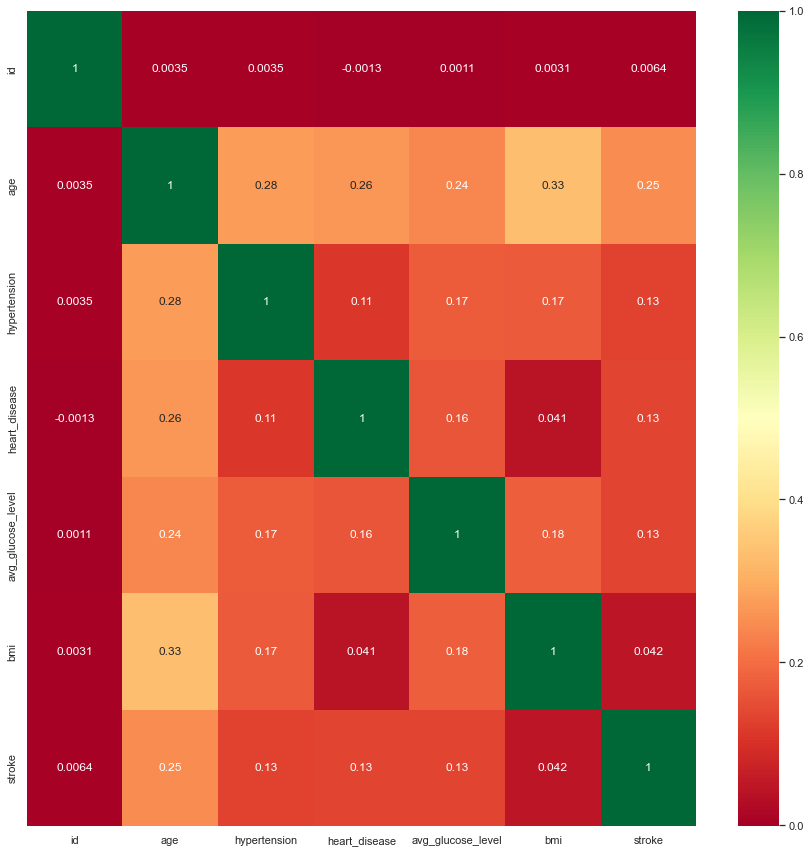

In [8]:
# Checking correlation between each parameter

# Heatmap
corrmat = df.corr()
top_corr_feature = corrmat.index

plt.figure(figsize=(15,15))

g = sns.heatmap(df[top_corr_feature].corr(), annot=True, cmap='RdYlGn')

From correlation matrix above, We can see the correlation for each input parameter with the target parameter is relatively low (below 0.5), the highest input parameter that is correlated with `Stroke` is `age` with correlation of 0.25.\
This is quite interisting, because the dataset tells the different story from the articles.

Since `id` input parameter is showing no correlation with our target parameter (e.g. one doesn't get stroke for having random `id` labeled to them.), I'll just drop the column here. 

In [9]:
# Dropping `id` input parameter

df.drop(columns='id', inplace=True)

Now let's take more closer look into each input parameter.

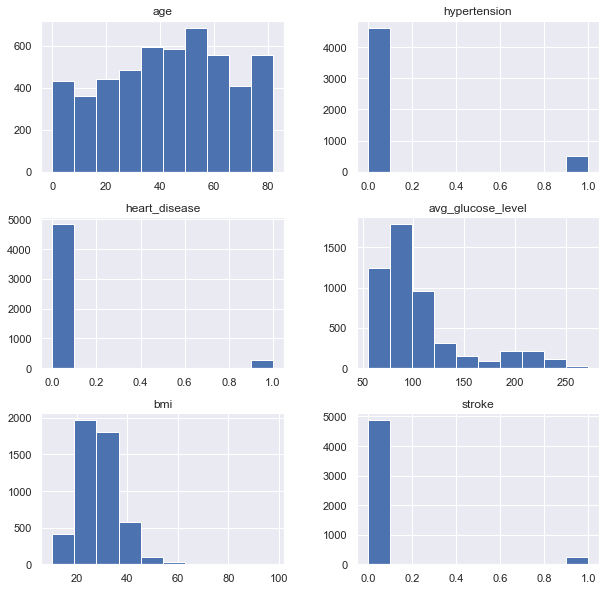

In [10]:
# Histogram plot

df.hist()
plt.gcf().set_size_inches(10, 10)
plt.show()

From histogram above, We can see that input parameter like `age`, `avg_glucose_level`, and `bmi` has `'numerical - scalar'` type input,\
while input parameter like `hypertension`, `heart_disease`, and `Stroke` has `'numerical - categorical'` type input.

Based on information above, I can classify each input parameter into two class, `numerical_col` and `categorical_col`.

In [11]:
# List all input parameter
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [12]:
# Classify input parameter based on input type

numerical_col = ['age', 'avg_glucose_level', 'bmi', 'smoking_status']
categorical_col = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type']

# `Stroke` is not included because it will be used as target parameter

## V. Data Preprocessing

### Dataset Splitting

In this process, I will split my dataset into three different set:
1. Train Set : Will be used for training the `machine learning` model.
2. Test Set : Will be used to test the `machine learning` model.
3. Inference Set : Will be used as if new instance

Since the entries in the dataset is `5110 rows`, I will use `110 entries as Inference Set`, `80% of 5000 entries as Training Set`, and `20% of 5000 as Test Set.`:

1. Train Set : 4000 entries
2. Test Set : 1000 entries
3. Inference Set : 110 entries

all of those entries will be randomly selected from the dataset.

In [13]:
# Inference Set Preparation

inf_set = df.sample(110, random_state=10)
inf_set.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2413,Female,58.00,0,0,Yes,Private,Rural,100.42,39.5,smokes,0
1141,Male,57.00,0,0,Yes,Private,Rural,90.06,29.8,Unknown,0
146,Male,65.00,0,0,Yes,Self-employed,Urban,68.43,NaN,formerly smoked,1
3883,Female,1.64,0,0,No,children,Urban,69.89,18.1,Unknown,0
1044,Female,79.00,0,0,Yes,Govt_job,Urban,93.89,30.4,never smoked,0


In [14]:
# Exclude Inference Set from main dataset
train_set = df.drop(inf_set.index).reset_index()
train_set

,index,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
4996,5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
4997,5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
4998,5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [15]:
# Splitting Dataset

# X will be consist of input parameter only
X = train_set.drop(['stroke'], axis=1)

# y will be consist of target parameter only
y = train_set['stroke']

In [16]:
# Train Set & Test Set Preparation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print('Train Set shape : ', X_train.shape)
print('Test Set shape : ', X_test.shape)

Train Set shape :  (4000, 11)
Test Set shape :  (1000, 11)


### Handling Outliers

In this sub-process, I will handle any outliers inside `'numerical_col'` input parameter.

I'll check the distribution of the input parameter first. Distribution check is important for determining how to handle the outliers.

- If the input parameter is normally distributed, `Z-score` will be utilized for determining the outliers threshold.
- If the input parameter is skew distributed, `IQR` will be utilized for determining the outliers threshold.

I'll utilize `pandas.skewness()` method for this distribution check. Any skewness value outside `-0.5 to 0.5` will be considered as `Skewed Distribution`

In [17]:
# Input Paramater Distribution  Check
dist_check = X_train.skew(numeric_only=True)

for i in range(len(dist_check)):
    if dist_check.values[i] < -0.5:
        print(dist_check.index[i], ': Negatively skewed distribution')
    elif dist_check.values[i] > 0.5:
        print(dist_check.index[i], ': Positively skewed distribution')
    else:
        print(dist_check.index[i], ': Normally distributed')

index : Normally distributed
age : Normally distributed
hypertension : Positively skewed distribution
heart_disease : Positively skewed distribution
avg_glucose_level : Positively skewed distribution
bmi : Positively skewed distribution


From result above, We can ignore `index` since it is not input poarameter. We also can see that only `age` input parameter is `Normally Distributed.` Others is `Skewed Distribution.`

We will focus on input parameter that is in `'numerical_col'`, since there is no such outliers in input parameter in `'categorical_col'` 

Now let's check if there are any outliers in each input parameter.

In [18]:
# Outliers Detection Function
# for Normally Distributed Data

def detect1(df, parameter):

    threshold = 3
    mean_ = np.mean(df[parameter])
    std_ = np.std(df[parameter])

    result = df[
        abs((df[parameter]-mean_)/std_) > threshold
    ]
    return result


In [19]:
# Outliers Detection Function
# for Skew Distributed Data

def detect2(df, parameter):

    IQR = df[parameter].quantile(0.75) - df[parameter].quantile(0.25)
    upper = df[parameter].quantile(0.75) + (1.5*IQR)
    bottom = df[parameter].quantile(0.25) - (1.5*IQR)

    result = df[
        (df[parameter] > upper) |
        (df[parameter] < bottom)
    ]
    return result
    
    

In [20]:
# Outlier Check
# Input Parameter : `age`

out_age = detect1(X_train, parameter='age')
print('Outliers count :', len(out_age))
print('Total entries :', len(X_train['age']))
print()
print('Outliers percentage :', len(out_age)/len(X_train['age'])*100)

Outliers count : 0
Total entries : 4000

Outliers percentage : 0.0


Based on result above, it seems `age` input parameter is free from outliers.

In [21]:
# Outlier Check
# Input Parameter : `avg_glucose_level`

out_glucose = detect2(X_train, parameter='avg_glucose_level')
print('Outliers count :', len(out_glucose))
print('Total entries :', len(X_train['avg_glucose_level']))
print()
print('Outliers percentage :', len(out_glucose)/len(X_train['avg_glucose_level'])*100)

Outliers count : 493
Total entries : 4000

Outliers percentage : 12.325


Based on result above, `avg_glucose_level` input parameter has `493 entries` that are outliers. Equal to 12.325 % of total entries.

Based on the article, We know that `avg_glucose_level` is closely realted to `Diabetes` in which affect someone possibility to get `Stroke.`\
In other words, high `avg_glucose_level` could lead into `Stroke.`

Let's see does the outliers is on `bottom` or `upper` part of the dataset, and :
- If those outliers happens to be at `upper` part, I'll let the outliers be
- If those outliers happens to be at `bottom` part, I'll cap the input value

In [22]:
# Finding upper and bottom threshold for capping

IQR = X_train['avg_glucose_level'].quantile(0.75) - X_train['avg_glucose_level'].quantile(0.25)
upper = X_train['avg_glucose_level'].quantile(0.75) + (1.5*IQR)
bottom = X_train['avg_glucose_level'].quantile(0.25) - (1.5*IQR)


print(X_train['avg_glucose_level'].quantile(0.75))
print(X_train['avg_glucose_level'].quantile(0.25))
print(IQR)
print()
print('Upper Limit: ',upper)
print('Bottom Limit: ',bottom)

114.1075
77.12
36.9875

Upper Limit:  169.58875
Bottom Limit:  21.63875000000001


In [23]:
# Check outliers count
# Over `upper` limit

X_train.loc[
    X_train['avg_glucose_level'] > upper, 'avg_glucose_level'
].count()

493

In [24]:
# Check outliers count
# Over `bottom` limit

X_train.loc[
    X_train['avg_glucose_level'] < bottom, 'avg_glucose_level'
].count()

0

Based on result above, because all outliers are above the `upper` limit, I'll just let them be.

In [25]:
# Outlier Check
# Input Parameter : `bmi`

out_bmi = detect2(X_train, parameter='bmi')
print('Outliers count :', len(out_bmi))
print('Total entries :', len(X_train['bmi']))
print()
print('Outliers percentage :', len(out_bmi)/len(X_train['bmi'])*100)

Outliers count : 90
Total entries : 4000

Outliers percentage : 2.25


Based on result above, `bmi` input parameter has `90 entries` that are outliers. Equal to 2.25 % of total entries. Since this can be considered as small amount, I will trim those data out of the `Train Set`

In [26]:
# Outlier Handling
# Input Parameter : `avg_glucose_level`

print('Total entries before trimming:', len(X_train['bmi']))

X_train = X_train.drop(out_bmi.index)
y_train = y_train.drop(out_bmi.index)

print('Total entries after trimming:', len(X_train['bmi']))

Total entries before trimming: 4000
Total entries after trimming: 3910


In [27]:
# Outlier Re-Check
# Input Parameter : `bmi`
# Confirming the trimming result

out_bmi = detect2(X_train, parameter='bmi')
print('Outliers count :', len(out_bmi))
print('Total entries :', len(X_train['bmi']))
print()
print('Outliers percentage :', len(out_bmi)/len(X_train['bmi'])*100)

Outliers count : 7
Total entries : 3910

Outliers percentage : 0.17902813299232737


Although after trimming process, `bmi` input parameter still has outliers. This is happened due to the trimming process will produce new `IQR` value, hence there is possibiliity of new outliers generated. But since the percentage is below 1%, I'll just let them be.

### Missing Value

In this sub-process, I will handle any missing value inside the dataset. From previous process, We know that `bmi` input parameter is the only input parameter with apparent missing value. But in this process, I will search for any `Unexpected missing Value` inside all input parameter.

This will be done by checking all unique value in each input parameter and compare it with input parameter description.

In [28]:
# Unexpected missing value detection
# Input Parameter : Gender
# Desc : "Male", "Female" Or "Other" 

print(X_train['gender'].unique())
print(X_test['gender'].unique())

['Female' 'Male' 'Other']
['Male' 'Female']


Inside `gender` input parameter in `Train Set`, there is `Other` inputed as entry. I want to check wether it is `Unexpected missing value` or not.

In [29]:
# Unexpected missing value detection
# Input Parameter : Gender with "Other" value

X_train[
    X_train['gender']=='Other'
]

,index,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3040,3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked


It seems there is only one entry that list `Other` as gender, I can identify this as `Missing completly at Random` type of missing value.\
Since this belongs to `'Categorical_col'`, I will replace the value with the `Mode` of the `gender` input parameter.

In [30]:
# Unexpected missing value handling
# Input Parameter : Gender with "Other" value

X_train.loc[
    X_train['gender']=='Other', 'gender'
] = X_train['gender'].mode().iat[0]

In [31]:
# Unique Value Confirmation
print(X_train['gender'].unique())

['Female' 'Male']


After replacing the `Other` value, I can confirm that `gender` input parameter is free from any missing value.

In [32]:
# Unexpected missing value detection
# Input Parameter : age
# Desc : Age Of The Patient 

print(X_train['age'].unique().round(1))
print()
print(X_test['age'].unique().round(1))

[16.  29.  50.  80.  55.  13.   8.  57.  78.  18.  10.   3.  71.  69.
 40.  51.  25.  45.  81.  22.  36.  49.  66.  58.  75.  72.  30.  27.
 14.  37.  48.  59.  65.   6.  46.   7.   9.  47.   5.  44.  52.  61.
 28.  70.  42.  38.  43.  73.  56.  26.  34.   4.  54.  39.  60.  68.
 41.  63.  11.  15.  77.  21.  32.  24.  17.  62.  23.   1.9  1.3  0.6
 53.  79.   0.8 19.  64.  33.   0.3 76.  35.  12.  67.  82.   1.8 74.
  2.  20.   1.6 31.   0.7  1.   0.2  1.6  0.1  0.9  1.7  1.4  1.1  1.2
  0.5  0.6  1.5  0.2  1.2  0.4]

[ 3.  40.  65.   7.  79.  53.  45.  37.  36.  46.  16.  59.  74.  25.
 57.  49.  70.  51.  41.  55.  33.  64.  62.  14.  34.   0.6 38.   6.
 43.  78.  80.   1.5  2.  61.  39.  81.  24.  23.  72.  31.  15.  73.
 52.   8.  60.  32.  77.  42.   0.6 63.  82.  12.  71.  29.  58.  50.
 10.  20.  67.  47.  75.   1.9 26.  28.   1.2 56.  54.  18.   9.   5.
 17.   0.1 48.  66.  30.   1.1 19.  22.  27.  44.  69.   1.8 35.  76.
 13.   1.3  1.7 21.   4.   1.2 68.  11.   0.2  1.6  0.4

There are some entries that is strange in `age` input parameter, there are value that is in decimal format (e.g. 1.6, 0.7, 0.2, etc.). Let's take a closer look in the dataset.

In [33]:
# age with decimal / floating format check
# filter out age with decimal / floating format

X_train[
    X_train['age'].astype(int) < X_train['age']
    ][['age', 'ever_married', 'work_type']]

,age,ever_married,work_type
3627,1.88,No,children
3021,1.32,No,children
359,0.64,No,children
3539,0.80,No,children
4803,0.32,No,children
...,...,...,...
3961,0.48,No,children
3915,0.72,No,children
2065,1.24,No,children
3531,0.16,No,children


In [34]:
# age with decimal / floating format check
# filter out age with decimal / floating format

X_test[
    X_test['age'].astype(int) < X_test['age']
    ][['age', 'ever_married', 'work_type']]

,age,ever_married,work_type
1961,0.64,No,children
3234,1.48,No,children
1957,0.56,No,children
1453,1.88,No,children
3498,1.24,No,children
3217,0.08,No,children
3240,1.08,No,children
3837,1.80,No,children
2736,1.24,No,children
4827,1.32,No,children


We can see that `age` entries that is in decimal format is have not yet married and is children. So, based on those facts, I can assume some entries in `age` include months into account. That is the reason some `age` is in decimal format.

For uniformity of the dataset, I will convert those decimal format `age` into integer format.

In [35]:
# Round up values under a single DataFrame column

X_train.loc[
    X_train['age'].astype(int) < X_train['age'], 'age'
] = X_train['age'].apply(np.ceil)

X_test.loc[
    X_test['age'].astype(int) < X_test['age'], 'age'
] = X_test['age'].apply(np.ceil)

In [36]:
# Confirmation
print(X_train['age'].describe().T)
print()
print(X_test['age'].describe().T)

count    3910.000000
mean       43.187468
std        22.659433
min         1.000000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

count    1000.000000
mean       43.139000
std        22.959722
min         1.000000
25%        24.750000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64


Based on `min and max` value on result above, I can confirm that all input in `age` input parameter is free from any missing value.

In [37]:
# Unexpected missing value detection
# Input Parameter : heart_disease
# Desc : 0 If The Patient Doesn't Have Any Heart Diseases, 1 If The Patient Has A Heart Disease

print(X_train['heart_disease'].unique())
print(X_test['heart_disease'].unique())

[0 1]
[0 1]


Unique value in `heart_disease` input 'bmi' already match the input parameter description.

In [38]:
# Unexpected missing value detection
# Input Parameter : ever_married
# Desc : "No" Or "Yes" 

print(X_train['ever_married'].unique())
print(X_test['ever_married'].unique())

['No' 'Yes']
['No' 'Yes']


Unique value in `ever_married` input parameter already match the input parameter description.

In [39]:
# Unexpected missing value detection
# Input Parameter : work_type
# Desc : "Children", "Govt\_Jov", "Never\_Worked", "Private" Or "Self-Employed"

print(X_train['work_type'].unique())
print(X_test['work_type'].unique())

['Private' 'children' 'Self-employed' 'Govt_job' 'Never_worked']
['children' 'Govt_job' 'Private' 'Self-employed' 'Never_worked']


Unique value in `work_type` input parameter already match the input parameter description.

In [40]:
# Unexpected missing value detection
# Input Parameter : Residence_type
# Desc : "Rural" Or "Urban"

print(X_train['Residence_type'].unique())
print(X_test['Residence_type'].unique())

['Rural' 'Urban']
['Rural' 'Urban']


Unique value in `Residence_type` input parameter already match the input parameter description.

In [41]:
# Unexpected missing value detection
# Input Parameter : avg_glucose_level
# Desc : Average Glucose Level In Blood

print(X_train['avg_glucose_level'].describe(percentiles=[0.5]).T)
print()
print(X_test['avg_glucose_level'].describe(percentiles=[0.5]).T)

count    3910.000000
mean      105.894583
std        45.073990
min        55.120000
50%        91.850000
max       271.740000
Name: avg_glucose_level, dtype: float64

count    1000.000000
mean      105.844960
std        44.640603
min        55.260000
50%        91.820000
max       267.610000
Name: avg_glucose_level, dtype: float64


All entries in `avg_glucose_level` input parameter seems okay, no strange entry in it.

In [42]:
# Unexpected missing value detection
# Input Parameter : bmi
# Desc : Body Mass Index 

print(X_train['bmi'].unique())
print(X_test['bmi'].unique())

[24.9 37.1 27.6 24.  26.5 17.2 19.1 29.6  nan 31.7 30.1 35.1 36.9 31.4
 35.2 30.9 27.4 25.  23.  32.8 32.1 16.  39.6 18.1 29.2 24.6 22.7 16.1
 31.  27.9 22.1 21.8 24.4 18.7 28.9 32.6 17.7 41.  36.2 15.5 14.9 33.1
 27.2 22.2 26.7 24.1 29.4 35.6 26.  30.  26.3 41.1 26.8 28.4 40.8 25.1
 30.3 23.8 33.4 22.3 27.5 38.2 14.6 28.8 24.5 20.1 21.  39.7 39.8 23.6
 32.5 43.9 15.7 18.3 17.4 29.  38.  27.3 39.9 29.1 43.6 21.2 33.8 34.8
 25.6 15.1 32.7 31.2 18.8 28.  43.3 36.1 26.4 21.6 20.  18.6 25.9 34.2
 17.1 30.5 22.9 24.3 28.6 28.5 29.5 21.5 41.2 41.8 32.2 23.5 26.9 20.2
 25.2 19.5 26.1 31.9 28.7 43.2 19.4 30.2 35.3 31.3 15.9 12.3 46.  19.6
 38.7 16.4 29.7 30.6 28.1 28.3 43.7 17.9 16.5 24.2 29.9 25.8 33.5 30.4
 32.3 28.2 36.  17.6 19.3 17.  33.3 20.4 21.9 29.8 12.  21.7 26.6 35.8
 35.9 18.5 20.5 27.1 41.7 34.1 21.4 20.6 31.1 25.4 21.3 20.8 32.4 22.4
 40.  45.  23.3 31.6 16.7 35.4 30.7 18.9 27.7 23.2 45.5 38.9 18.2 19.8
 27.  20.9 27.8 34.4 42.9 34.5 40.3 18.  31.8 22.8 31.5 41.5 23.1 34.9
 34.6 

In [43]:
pd.set_option('display.max.rows', None)
X_train[X_train['bmi'].isnull()].head(10)

,index,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
56,57,Male,78.0,0,0,Yes,Private,Urban,237.75,NaN,formerly smoked
1427,1457,Male,27.0,0,0,No,Private,Rural,191.79,NaN,smokes
77,78,Female,51.0,0,0,Yes,Private,Urban,165.31,NaN,never smoked
1679,1719,Male,34.0,0,0,Yes,Private,Rural,86.51,NaN,formerly smoked
3099,3176,Male,39.0,0,0,Yes,Private,Rural,84.18,NaN,smokes
3853,3945,Female,75.0,0,1,Yes,Self-employed,Urban,83.88,NaN,smokes
1274,1300,Female,71.0,0,0,Yes,Private,Urban,214.77,NaN,Unknown
4930,5039,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked
1469,1503,Female,61.0,1,1,Yes,Private,Urban,237.58,NaN,formerly smoked
13,13,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown


From the previous process, We know that `bmi` is the only input parameter with `NaN` values in it. Let's replace those values. 

Since there is no apparent pattern inside the dataset that can explain why this missing value happened, I'll consider missing value on `bmi` input parameter as `Missing Completly at Random`.

I'll replace the `NaN` value with the mean value.

In [44]:
# Replacing NaN value
# Input Parameter : 'bmi'

X_train['bmi'].fillna(X_train['bmi'].mean(), inplace=True)
X_test['bmi'].fillna(X_test['bmi'].mean(), inplace=True)

In [45]:
# Confirmation

print(X_train['bmi'].isna().sum())
print(X_test['bmi'].isna().sum())

0
0


From confirmation process, I can confirm that there is no `NaN` value in `bmi` input parameter.

In [46]:
# Unexpected missing value detection
# Input Parameter : smoking_status
# Desc : "Formerly Smoked", "Never Smoked", "Smokes" Or "Unknown"

print(X_train['smoking_status'].unique())
print(X_test['smoking_status'].unique())

['Unknown' 'never smoked' 'formerly smoked' 'smokes']
['Unknown' 'never smoked' 'formerly smoked' 'smokes']


Unique value in `smoking_status` input parameter already match the input parameter description. But We got note like this, 

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient.

Let's see how many `smoking_status` entries with `unknown` value.

In [47]:
# Filter smoking status

a = X_train[
        X_train['smoking_status']=='Unknown'
        ]['smoking_status'].count()
b = X_train['smoking_status'].count()

print('Unknown value count :', a)
print('Overall value count :', b)
print('Percentage of Uknown value :', a/b*100)

Unknown value count : 1191
Overall value count : 3910
Percentage of Uknown value : 30.460358056265985


In [48]:
# Filter smoking status

a = X_test[
        X_test['smoking_status']=='Unknown'
        ]['smoking_status'].count()
b = X_test['smoking_status'].count()

print('Unknown value count :', a)
print('Overall value count :', b)
print('Percentage of Uknown value :', a/b*100)

Unknown value count : 301
Overall value count : 1000
Percentage of Uknown value : 30.099999999999998


We got `Unknown` value both in `Train Set` and `Test Set`. both value equal to `30%` of overall entries, I will consider this `Unknown` value as `Missing Completely at Random` type of `missing value` because there is no apparent patern in the whole dataset that can describe why this is happening. 

In [49]:
# 'Unknown' value check
X_train[
    X_train['smoking_status']=='Unknown'
].sample(10)

,index,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4373,4472,Female,14.0,0,0,No,children,Urban,63.74,22.4,Unknown
4158,4254,Female,10.0,0,0,No,children,Urban,77.43,16.2,Unknown
3564,3651,Male,7.0,0,0,No,children,Rural,91.81,15.8,Unknown
575,582,Female,26.0,0,0,Yes,Private,Rural,59.17,20.0,Unknown
3139,3217,Female,61.0,0,0,Yes,Private,Urban,87.52,23.7,Unknown
1073,1093,Female,1.0,0,0,No,children,Rural,55.86,16.0,Unknown
1266,1292,Male,13.0,0,0,No,children,Rural,57.37,17.6,Unknown
3850,3942,Male,5.0,0,0,No,children,Urban,79.89,13.8,Unknown
2466,2531,Male,4.0,0,0,No,children,Rural,62.48,19.9,Unknown
4120,4215,Female,13.0,0,0,No,children,Rural,138.44,34.8,Unknown


Since this is `Missing Completely at Random` type of `missing value`, I will replace the `Unknown` value on `smoking_status` input parameter with its `Mode`.

In [50]:
# Missing Value Handling
# Input Parameter : smoking_status with "Unknown" value

X_train.loc[
    X_train['smoking_status']=='Unknown', 'smoking_status'
] = X_train['smoking_status'].mode().iat[0]

X_test.loc[
    X_test['smoking_status']=='Unknown', 'smoking_status'
] = X_test['smoking_status'].mode().iat[0]

In [51]:
# Confirmation Check

a = X_train[
        X_train['smoking_status']=='Unknown'
        ]['smoking_status'].count()
b = X_train['smoking_status'].count()

print('Unknown value count :', a)
print('Overall value count :', b)
print('Percentage of Uknown value :', a/b*100)

Unknown value count : 0
Overall value count : 3910
Percentage of Uknown value : 0.0


In [52]:
# Confirmation Check

a = X_test[
        X_test['smoking_status']=='Unknown'
        ]['smoking_status'].count()
b = X_test['smoking_status'].count()

print('Unknown value count :', a)
print('Overall value count :', b)
print('Percentage of Uknown value :', a/b*100)

Unknown value count : 0
Overall value count : 1000
Percentage of Uknown value : 0.0


From confirmation process, I can confirm that `smoking_status` is free from any missing value.

In [53]:
# Unexpected missing value detection
# Input Parameter : Stroke
# Desc : 1 If The Patient Had A Stroke Or 0 If Not 

print(y_train.unique())
print(y_test.unique())

[0 1]
[0 1]


Unique value in `Stroke` target parameter already match the input parameter description.

### Feature Selection

In this part of sub-process, I will select input parameters that affect the target parameter (`Stroke`).

I'll refer back to the article that I mention in `Exploratory Data Analysis` process above. Hence, I will only use:
- `gender`
- `age`
- `hypertension`
- `heart_disease`
- `avg_glucose_level`
- `bmi`
- `smoking status`

As my input parameters and drop the rest.

In [54]:
# Dropping unused input parameter

X_train.drop(columns=['ever_married', 'work_type', 'Residence_type',], inplace=True)
X_test.drop(columns=['ever_married', 'work_type', 'Residence_type',], inplace=True)

Since I dropped some input parameter, there is change need to be made for `numerical_col` and `categorical_col` list.

In [55]:
# Classify input parameter based on input type

numerical_col = ['age', 'avg_glucose_level', 'bmi']
categorical_col = ['gender', 'smoking_status', 'hypertension', 'heart_disease']

In [56]:
# Splitting Dataset based on input type

X_train_num = X_train[numerical_col]
X_train_cat = X_train[categorical_col]

X_test_num = X_test[numerical_col]
X_test_cat = X_test[categorical_col]

### Feature Scaling

In this part of sub-process, I will scaled all `'numerical_col'` so that each input across each input parameter is well balanced.

Since I will use `Linear Regression` algorithm for my machine learning model, I'll utilize `StandardScaler` as my scaling method.

In [57]:
# Define the scaling method
scaler = StandardScaler()

# Train the data into scaler
# Use only data from `Train Set` for training
scaler.fit(X_train_num)

# Transform the input value for each input parameter
# Transform both `Train Set` and `Test Set`
X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

### Feature Encoding

In this part of sub-process, I will scaled all `'categorical_col'` so that each input across each input parameter is well balanced.

Since there is no apparent hierarchy in the input across `'categorical_col'` input parameter, I'll utilize `One-Hot Encoder` as my encoding method.

In [58]:
# Define the encoding method
encoder = OneHotEncoder()

# Train the data into scaler
# Use only data from `Train Set` for training
encoder.fit(X_train_cat)

# Transform the input value for each input parameter
# Transform both `Train Set` and `Test Set`
X_train_cat_encoded = encoder.transform(X_train_cat).toarray()
X_test_cat_encoded = encoder.transform(X_test_cat).toarray()

### Stitching Back Dataset

In this part of sub-process, I will concatenate `'numerical_col'` and `'categorical_col'` into one dataframe.

In [59]:
# Concatenate

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)

In [60]:
# Check
# Turn it into dataframe first

df_X_train_final = pd.DataFrame(X_train_final)
df_X_train_final.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11
3321,-0.317236,-0.642683,-0.996939,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1649,1.051023,-0.504448,0.009913,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
457,-0.096549,-0.655774,-0.035170,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3196,-1.817907,-0.003208,-1.267436,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3435,0.212413,0.200261,0.145162,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2414,0.609649,-0.649561,-0.005115,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2523,1.051023,-0.883429,1.197096,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
328,0.256550,0.959333,2.203948,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
961,1.095160,0.229328,-0.320695,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3341,-0.626198,2.256255,-0.816607,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


## VI. Model Definition

Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

In [61]:
# Model Definition
model = LogisticRegression()

## VII. Model Training

Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

In [62]:
# Model Training
model.fit(X_train_final, y_train)

LogisticRegression()

## VIII. Model Evaluation

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

In [63]:
# Determines prediction result
y_pred_train = model.predict(X_train_final)
y_pred_test = model.predict(X_test_final)

y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [64]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       945
           1       0.00      0.00      0.00        55

    accuracy                           0.94      1000
   macro avg       0.47      0.50      0.49      1000
weighted avg       0.89      0.94      0.92      1000



C:\Users\alam3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alam3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alam3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1318

C:\Users\alam3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


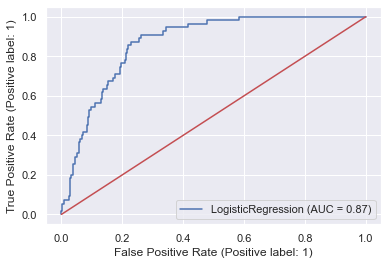

In [65]:
plot_roc_curve(model, X_test_final, y_test)
plt.plot([0,1], [0,1], c='r')

## IX. Model Inference

Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

In this part of process, I will try to feed the machine learning model using the `Inference Set` and see how it perform.

Before feed the set into the model, We need to do exact same process of `Outlier handling`, `Missing Value handling`, `Feature selection and engineering` process to the `Inference Set`

In [66]:
# Inference Set
inf_set.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2413,Female,58.00,0,0,Yes,Private,Rural,100.42,39.5,smokes,0
1141,Male,57.00,0,0,Yes,Private,Rural,90.06,29.8,Unknown,0
146,Male,65.00,0,0,Yes,Self-employed,Urban,68.43,NaN,formerly smoked,1
3883,Female,1.64,0,0,No,children,Urban,69.89,18.1,Unknown,0
1044,Female,79.00,0,0,Yes,Govt_job,Urban,93.89,30.4,never smoked,0


In [67]:
# Splitting Process

# X will be consist of input parameter only
X_inf = inf_set.drop(['stroke'], axis=1)

# y will be consist of target parameter only
y_inf = inf_set['stroke']

In [68]:
# Input Parameter check
X_inf.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2413,Female,58.00,0,0,Yes,Private,Rural,100.42,39.5,smokes
1141,Male,57.00,0,0,Yes,Private,Rural,90.06,29.8,Unknown
146,Male,65.00,0,0,Yes,Self-employed,Urban,68.43,NaN,formerly smoked
3883,Female,1.64,0,0,No,children,Urban,69.89,18.1,Unknown
1044,Female,79.00,0,0,Yes,Govt_job,Urban,93.89,30.4,never smoked


In [69]:
# Target Parameter check
y_inf.head()

2413    0
1141    0
146     1
3883    0
1044    0
Name: stroke, dtype: int64

In [70]:
# Splitting Dataset based on input type

X_inf_num = X_inf[numerical_col]
X_inf_cat = X_inf[categorical_col]

### Feature Scaling

In [71]:
# Define the scaling method
scaler = StandardScaler()

# Transform the input value for each input parameter
X_inf_num_scaled = scaler.fit_transform(X_inf_num)

### Feature Encoding

In [72]:
# Define the encoding method
encoder = OneHotEncoder()

# Transform the input value for each input parameter
X_inf_cat_encoded = encoder.fit_transform(X_inf_cat).toarray()

### Stitching Back Dataset

In [73]:
# Concatenate

X_inf_final = np.concatenate([X_inf_num_scaled, X_inf_cat_encoded], axis=1)

### Prediction

In [74]:
# Determines prediction result
y_pred_inf = model.predict(X_inf_final)

print(classification_report(y_inf, y_pred_inf))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## X. Conclusion